## Minimal example with TensorFlow2.0

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise

# data -> preprocessing -> .npv
# np.savez(flie name, arrays): saves n-dimensional arrays in .npz format, using a certian keyword (label) for each day
# arrays: label=data
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Solving with TensorFlow

In [3]:
# Data
training_data = np.load('TF_intro.npz')

In [4]:
# Model
input_szie = 2
output_size = 1

# tf.keras.Sequential() function that specifies how the model will be laid down ('stacks layers')
# Linear combination + outputs = layer
# tf.keras.layers.Dense(output size): takes the inputs provided to the model 
    # and calculates the dot product of the inputs and the weights and adds the bias
# tf.keras.layers.Dense(output size, kernel_initializer, bias_initializer): function that is laying down the model 
    # (used to 'stack layers') and initialize weights

# set the weights and bias
model =tf.keras.Sequential([
    tf.keras.layers.Dense(output_size, 
                          kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                            bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1))
    ])

In [5]:
# learning_rate
# tf.keras.optimizers.SGD(learning_rate) stochastic gradient descent optimizers, 
    # including support for learning_rate, momentum, decay
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# Objective function and optimization algorithm
# model.complie(optimizer,loss): configures the model for training
huber_loss='huber_loss'
mean_squared_error='mean_squared_error'
model.compile(optimizer=custom_optimizer, loss=mean_squared_error)

# model.fit(inputs, targets): fit (trains) the model
# Epoch = iteration over the full dataset
# verbose = 0 no output is being displayed, 
    # = 0 displayed 
    # = 2 one line display for each iteration
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 25.8847 - 375ms/epoch - 12ms/step
Epoch 2/100
32/32 - 0s - loss: 1.2161 - 42ms/epoch - 1ms/step
Epoch 3/100
32/32 - 0s - loss: 0.4091 - 39ms/epoch - 1ms/step
Epoch 4/100
32/32 - 0s - loss: 0.3993 - 35ms/epoch - 1ms/step
Epoch 5/100
32/32 - 0s - loss: 0.3978 - 33ms/epoch - 1ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3846 - 33ms/epoch - 1ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3965 - 35ms/epoch - 1ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3771 - 33ms/epoch - 1ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3763 - 36ms/epoch - 1ms/step
Epoch 10/100
32/32 - 0s - loss: 0.4032 - 35ms/epoch - 1ms/step
Epoch 11/100
32/32 - 0s - loss: 0.4197 - 34ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3810 - 36ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3780 - 32ms/epoch - 998us/step
Epoch 14/100
32/32 - 0s - loss: 0.3759 - 31ms/epoch - 967us/step
Epoch 15/100
32/32 - 0s - loss: 0.3769 - 31ms/epoch - 976us/step
Epoch 16/100
32/32 - 0s - loss: 0.3507 - 34ms/epoch - 1

## Extract weights and bias (how well the model has done)

In [6]:
model.layers[0].get_weights()

[array([[ 1.9912853],
        [-2.9441462]], dtype=float32),
 array([5.0002303], dtype=float32)]

In [7]:
## get_weights()[0] are weights
model.layers[0].get_weights()[0]

array([[ 1.9912853],
       [-2.9441462]], dtype=float32)

In [8]:
## get_weights()[1] is the bias 
model.layers[0].get_weights()[1]

array([5.0002303], dtype=float32)

## Extract the outputs (make predictions)

In [9]:
## model.predict_on_batch(data) calculates the outputs given inputs
# These are the vaues that were compared to the targets to evaluate the loss function
model.predict_on_batch(training_data['inputs'])

array([[-1.28614159e+01],
       [ 2.38916111e+00],
       [ 2.63368130e+01],
       [ 9.28567696e+00],
       [ 2.49385853e+01],
       [ 9.80821133e-01],
       [ 3.91602783e+01],
       [ 2.08583183e+01],
       [ 2.24002285e+01],
       [ 3.80131836e+01],
       [ 1.39589844e+01],
       [ 3.14815044e+01],
       [ 1.04519501e+01],
       [-1.31191177e+01],
       [ 3.76011963e+01],
       [ 1.13173342e+00],
       [ 3.88669243e+01],
       [ 1.21541119e+01],
       [-9.20643044e+00],
       [ 2.47879124e+01],
       [ 2.62060566e+01],
       [ 1.06786346e+00],
       [ 2.09034300e+00],
       [-9.49832916e+00],
       [-3.63913059e-01],
       [-2.01673183e+01],
       [ 9.38008118e+00],
       [ 2.62079906e+01],
       [-1.16311455e+01],
       [ 2.69947968e+01],
       [ 1.69341927e+01],
       [-5.50670767e+00],
       [-2.70152035e+01],
       [-1.94156599e+00],
       [ 2.06182909e+00],
       [ 3.81300430e+01],
       [ 2.11075001e+01],
       [-1.65906982e+01],
       [-8.5

In [10]:
training_data['targets'].round(1)

array([[-13. ],
       [  3.1],
       [ 27.6],
       [  9.6],
       [ 25.2],
       [  0.7],
       [ 38.8],
       [ 20.9],
       [ 23.6],
       [ 38.9],
       [ 13.2],
       [ 32.4],
       [ 11.2],
       [-13.5],
       [ 38. ],
       [  1.9],
       [ 39.6],
       [ 11.6],
       [ -8.6],
       [ 24.5],
       [ 25.6],
       [  0.3],
       [  1.8],
       [-10.5],
       [ -0.9],
       [-19.5],
       [  9.1],
       [ 25.7],
       [-12. ],
       [ 27.7],
       [ 16.2],
       [ -4.7],
       [-27.3],
       [ -2.9],
       [  1.3],
       [ 39.3],
       [ 22.1],
       [-16.3],
       [ -8.7],
       [ 13.2],
       [ 38.1],
       [ 40.3],
       [  6.6],
       [-11.9],
       [-37.2],
       [  2.5],
       [-14.4],
       [  4.5],
       [  2.3],
       [ 18.8],
       [ 34. ],
       [ 34.3],
       [ 24.2],
       [ 35.9],
       [  1.5],
       [-17.8],
       [ 11.3],
       [ 17.9],
       [ 45.3],
       [ 12.5],
       [ -8.5],
       [  0.1],
       [

## Plot the data

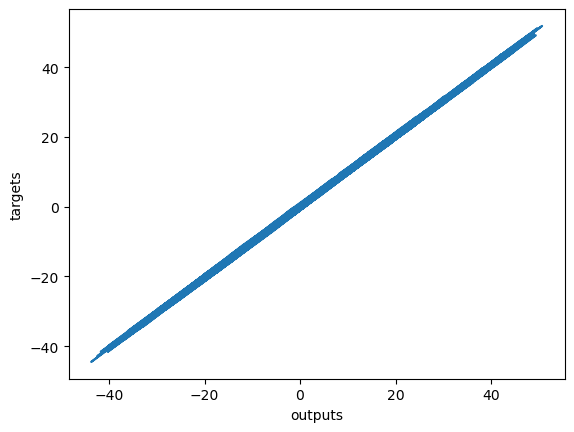

In [11]:
# We have to np.squeeze the arrays in order to fit them to what the plot function expects.
# Doesn't change anything as we cut dimensions of size 1 - just a technicality.
# Both of inputs and tagets in the training_data is 2D
# inputs is 1000*2 and target is 1000*1, so we need to lower them to be a vector/1D

plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()